In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data= ('C:\\Users\Layefa\Dropbox\PC\Downloads\CarRentalDataV1.csv')
df= pd.read_csv(data)

In [26]:
df.duplicated().sum()

0

In [27]:
df.isna().sum()

fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
airportcity             0
dtype: int64

In [28]:
df.fillna(0, inplace=True)

In [29]:
df

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
0,ELECTRIC,5.00,13.0,12.0,Seattle,US,47.449107,-122.308841,WA,12847615.0,135.0,Tesla,Model X,suv,2019.0,Albuquerque
1,ELECTRIC,5.00,2.0,1.0,Tijeras,US,35.111060,-106.276551,NM,15621242.0,190.0,Tesla,Model X,suv,2018.0,Albuquerque
2,HYBRID,4.92,28.0,24.0,Albuquerque,US,35.127163,-106.566681,NM,10199256.0,35.0,Toyota,Prius,car,2012.0,Albuquerque
3,GASOLINE,5.00,21.0,20.0,Albuquerque,US,35.149726,-106.711425,NM,9365496.0,75.0,Ford,Mustang,car,2018.0,Albuquerque
4,GASOLINE,5.00,3.0,1.0,Albuquerque,US,35.208659,-106.601008,NM,3553565.0,47.0,Chrysler,Sebring,car,2010.0,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,GASOLINE,5.00,32.0,27.0,Honolulu,US,21.292950,-157.836856,HI,9794111.0,33.0,Chevrolet,Cruze,car,2017.0,Honolulu
5847,HYBRID,5.00,17.0,16.0,Aiea,US,21.375507,-157.914919,HI,2754690.0,49.0,Lexus,HS 250h,car,2010.0,Honolulu
5848,GASOLINE,4.94,18.0,17.0,Kailua,US,21.378719,-157.727816,HI,11313508.0,35.0,smart,fortwo,car,2013.0,Honolulu
5849,GASOLINE,0.00,1.0,0.0,Waipahu,US,21.376105,-158.020237,HI,4209883.0,77.0,GMC,Savana,van,2015.0,Honolulu


In [30]:
df['renterTripsTaken'].median()

18.0

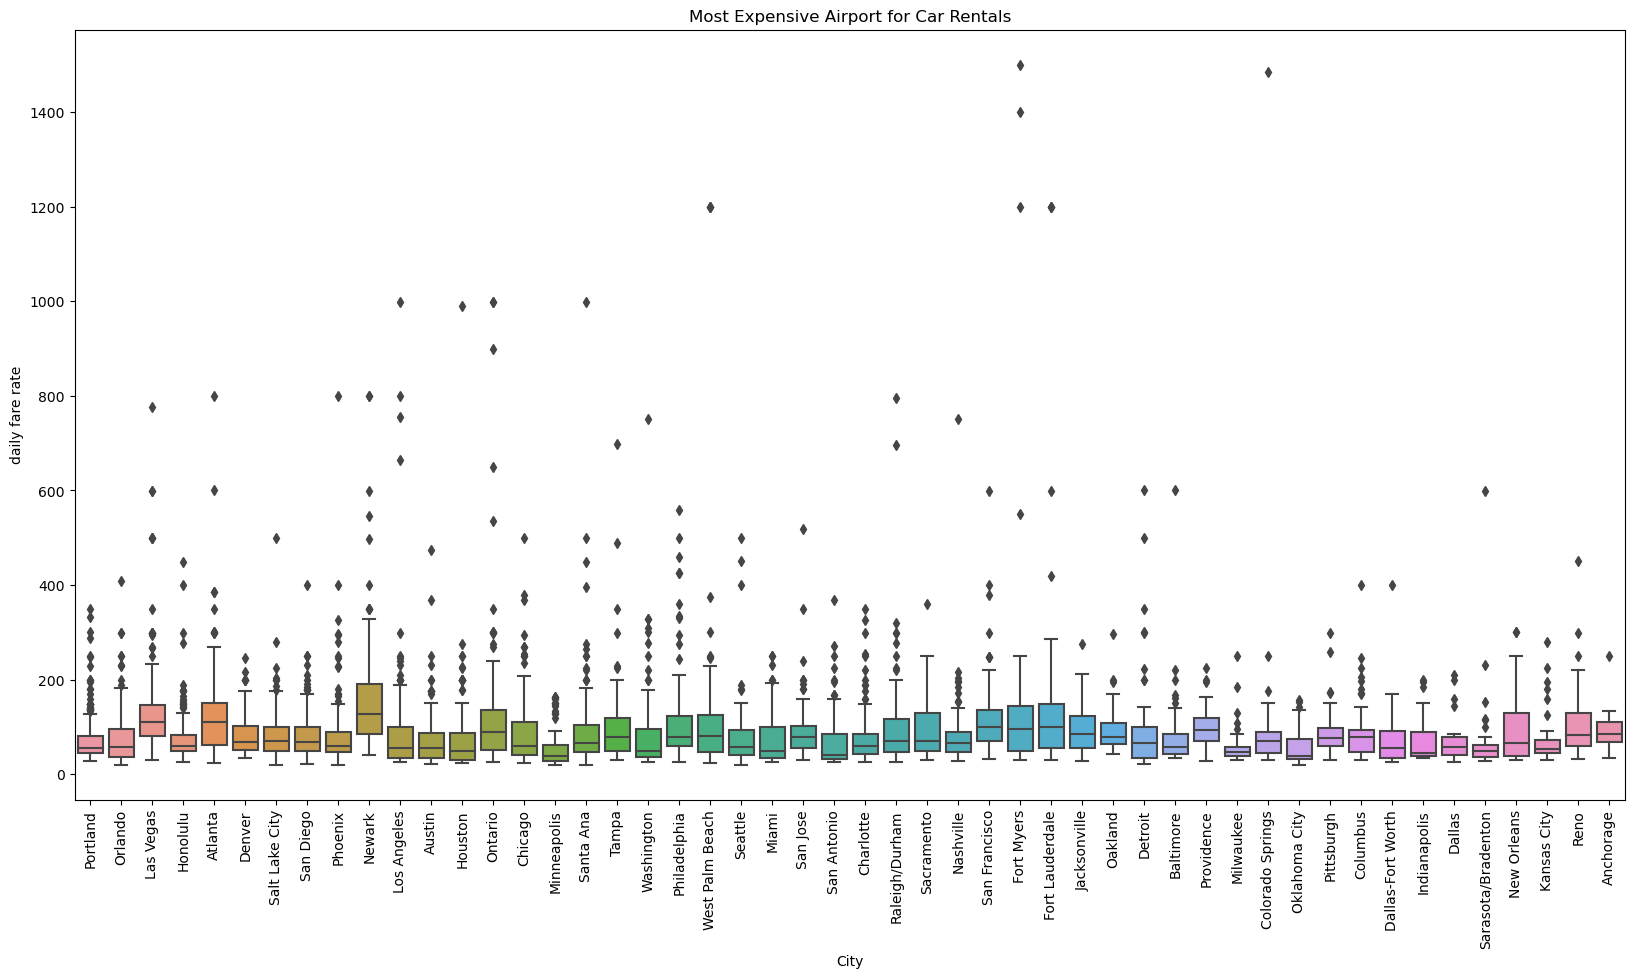

In [77]:
fig, ax = plt.subplots(figsize= (20, 10))
plt.xticks(rotation= 90)
sns.boxplot(y= 'rate.daily', x= 'airportcity', ax=ax, data= df,
             order = df['airportcity'].value_counts().iloc[:50].index)
plt.title('Most Expensive Airport for Car Rentals')
plt.ylabel('daily fare rate')
plt.xlabel('City')
fig.savefig('expensive airport for car rentals.jpeg')

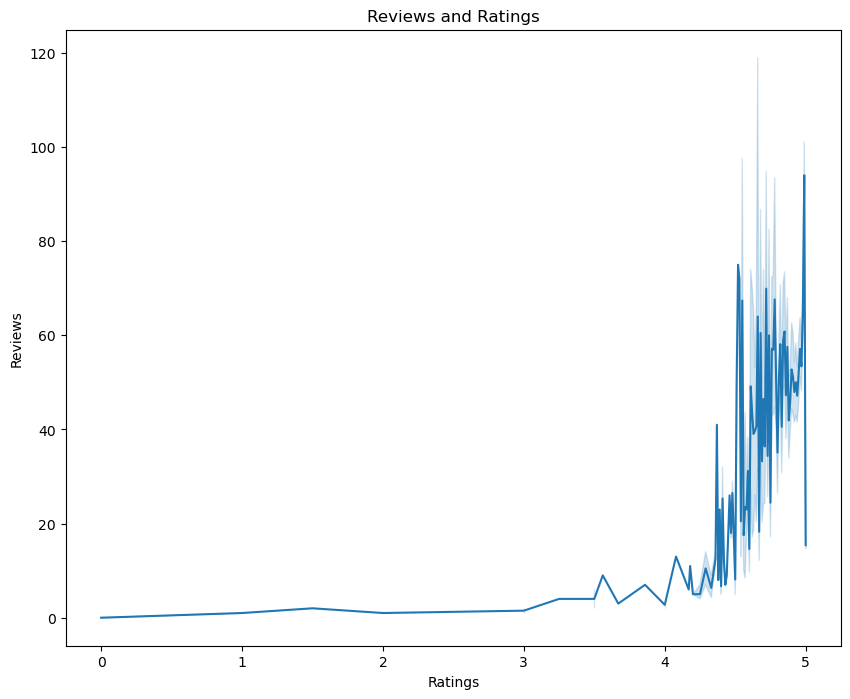

In [78]:
fig, ax= plt.subplots(figsize=(10, 8))
sns.lineplot(x= 'rating', y= 'reviewCount', data= df, ax= ax)
plt.title('Reviews and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
fig.savefig('Review VS Rating.jpeg')

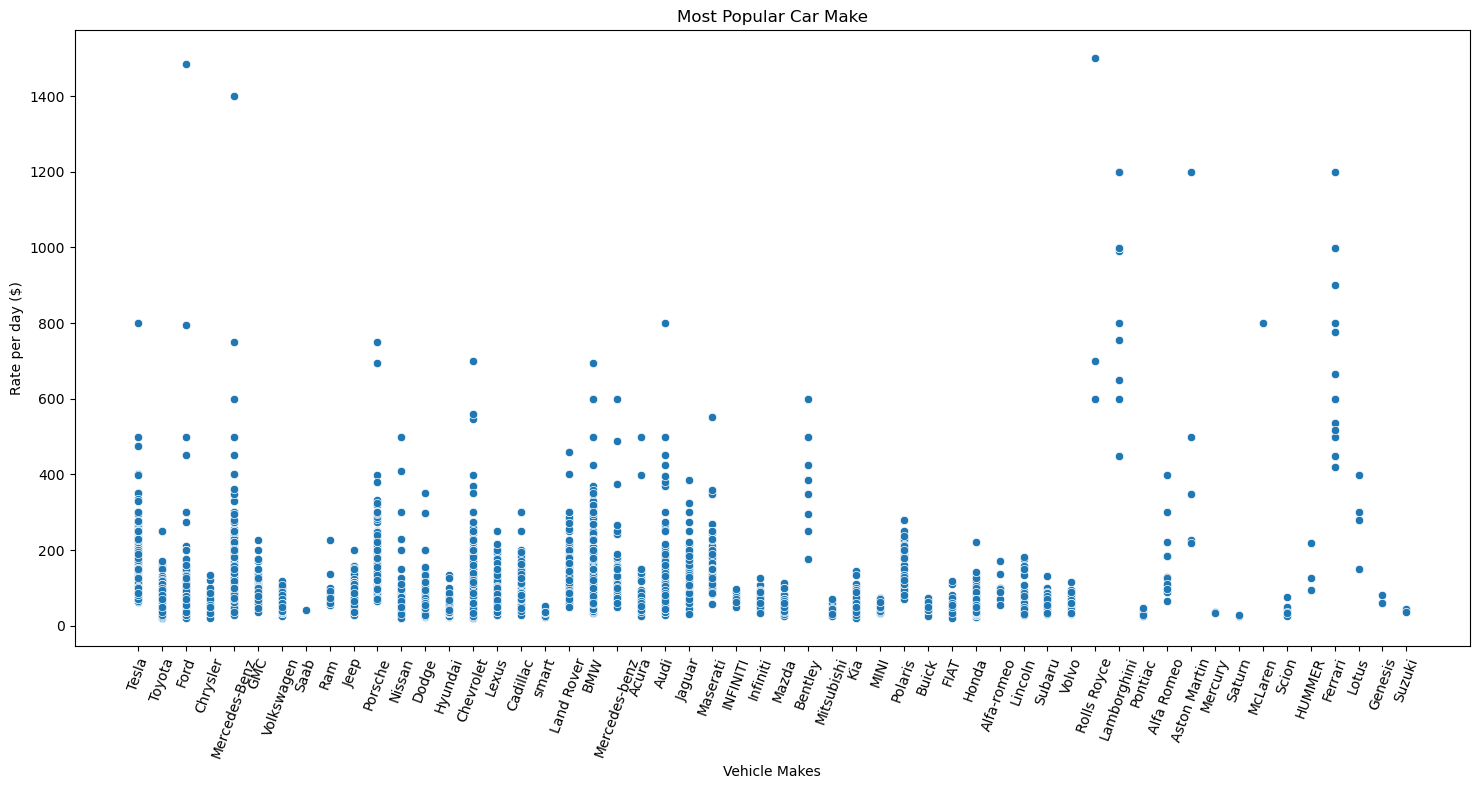

In [81]:
fig, ax= plt.subplots(figsize=(18, 8))
sns.scatterplot(x= 'vehicle.make', y= 'rate.daily', data= df, ax= ax)
plt.xticks(rotation= 70)
plt.title('Most Popular Car Make')
plt.xlabel('Vehicle Makes')
plt.ylabel('Rate per day ($)')
fig.savefig('popular car make.jpeg')

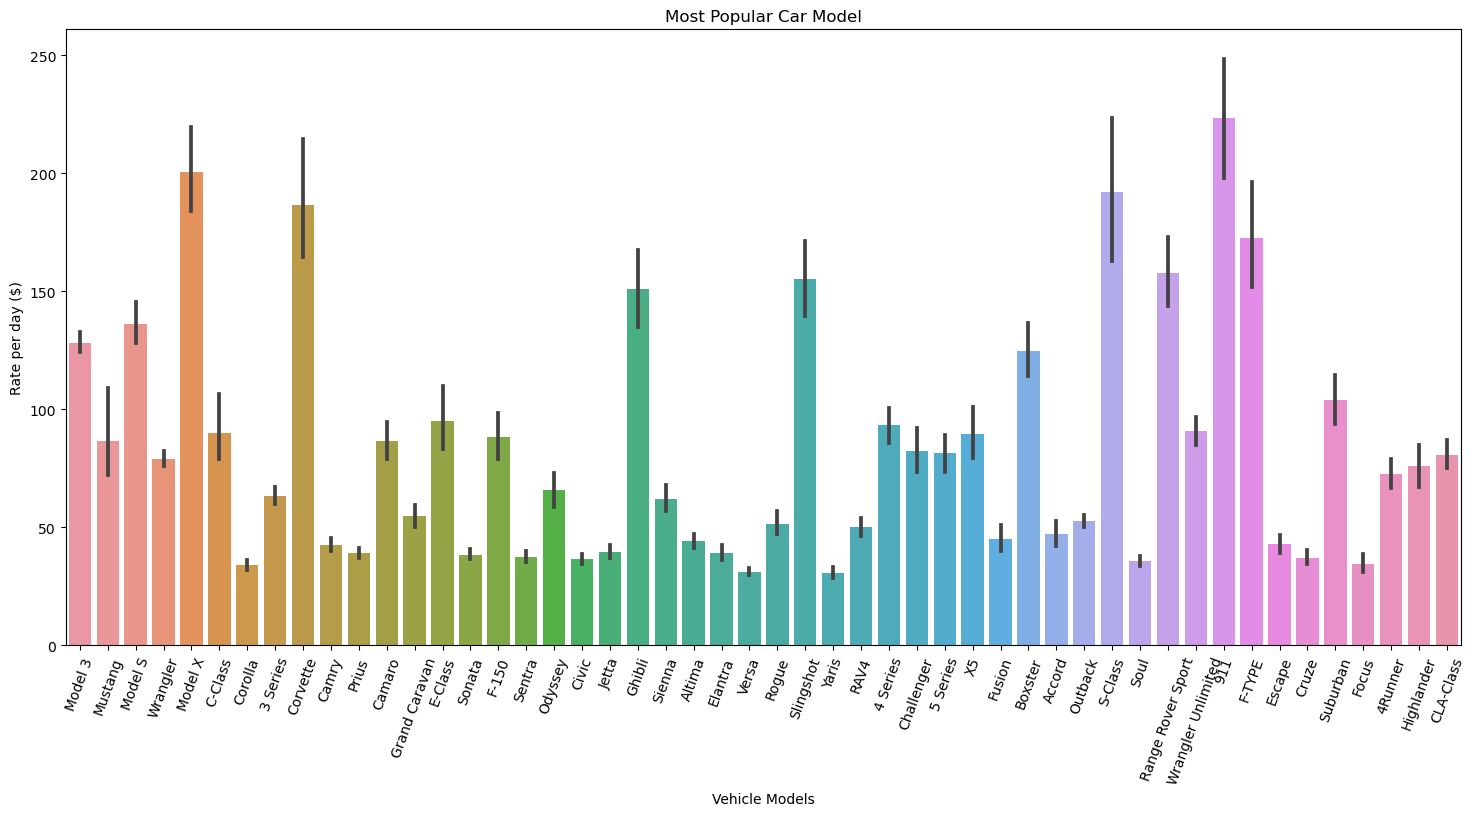

In [82]:
fig, ax= plt.subplots(figsize=(18, 8))
sns.barplot(x= 'vehicle.model', y= 'rate.daily', data= df, ax= ax,
                 order = df['vehicle.model'].value_counts().iloc[:50].index)
plt.xticks(rotation= 70)
plt.title('Most Popular Car Model')
plt.xlabel('Vehicle Models')
plt.ylabel('Rate per day ($)')
fig.savefig('popular car model.jpeg')

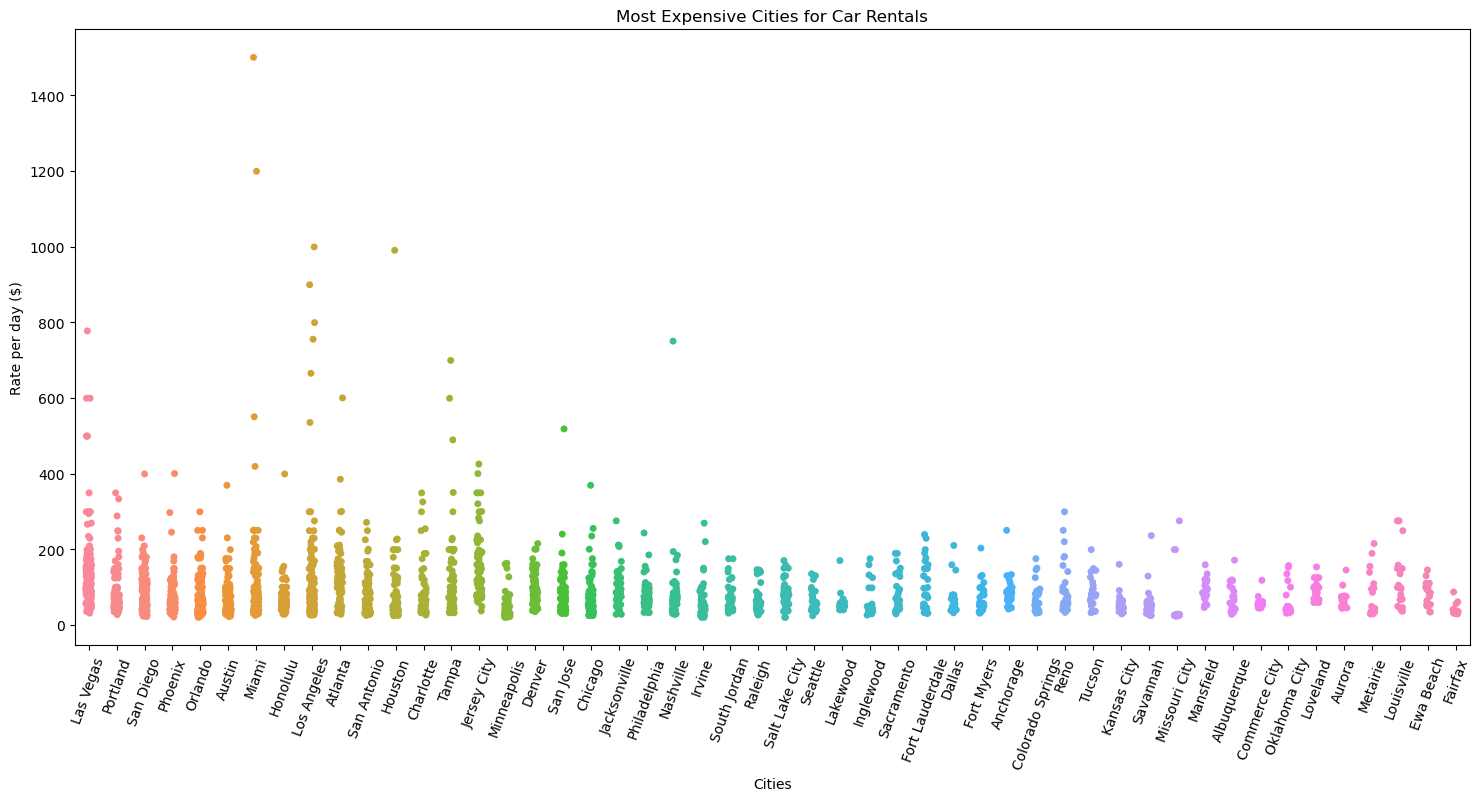

In [83]:
fig, ax= plt.subplots(figsize=(18, 8))
sns.stripplot(x= 'location.city', y= 'rate.daily', data= df, ax= ax,
     order = df['location.city'].value_counts().iloc[:50].index)
plt.xticks(rotation= 70)
plt.title('Most Expensive Cities for Car Rentals')
plt.xlabel('Cities')
plt.ylabel('Rate per day ($)')
fig.savefig('expensive cities.jpeg')

In [61]:
RevRate= df[['rating', 'reviewCount']].corr()
RevRate

,rating,reviewCount
rating,1.000000,0.240992
reviewCount,0.240992,1.000000


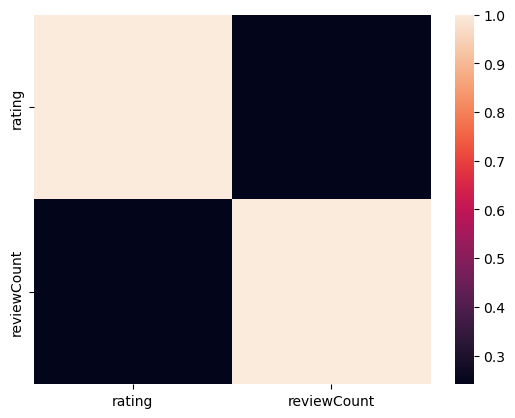

In [80]:
sns.heatmap(data= df[['rating', 'reviewCount']].corr())
fig.savefig('Review VS Rating2.jpeg')

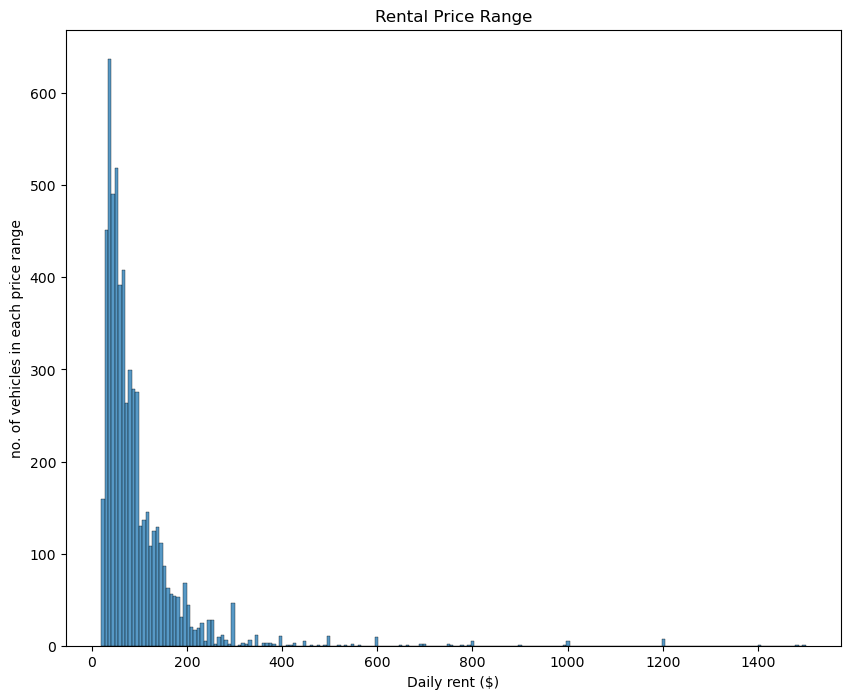

In [84]:
fig, ax= plt.subplots(figsize=(10, 8))
x= df['rate.daily']
sns.histplot(x)
plt.title('Rental Price Range')
plt.xlabel('Daily rent ($)')
plt.ylabel('no. of vehicles in each price range')
fig.savefig('rental price range.jpeg')

In [88]:
df[['renterTripsTaken', 'vehicle.year']].corr()

,renterTripsTaken,vehicle.year
renterTripsTaken,1.000000,-0.123407
vehicle.year,-0.123407,1.000000
